In [60]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf #Tensorflow handles the Training and Testing
from tensorflow import keras #Keras handles the importing of Data
import numpy as np #NumPy does funny math good
import matplotlib.pyplot as plt #MatPlotLib visualizes data

In [61]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data() #Loads the CIFAR 10 Dataset which has 60,000 RGB 32x32 px images split in a 5:1 Train-Test ratio
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

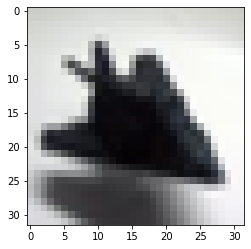

Airplane


In [62]:
index = 29

plt.figure()
plt.imshow(train_images[index])
plt.show()
print(class_names[train_labels[index, 0]]) 

In [63]:
#Data Formatting: Converts the 0-255 int range of each pixel to a 0-1 float  
train_images = train_images / 255.0
test_images = test_images / 255.0

In [64]:
#Creating the Network: Sets up the Convolutional Layers, NN Structure, connection types, and activation functions
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),     #-|
    keras.layers.MaxPooling2D((2, 2)),                                               # |  Convolutional Base
    keras.layers.Conv2D(64, (3, 3), activation='relu',),                             # |  Takes Image and breaks down components
    keras.layers.MaxPooling2D((2, 2)),                                               # |  Passes information about components to Perceptron for analysis 
    keras.layers.Conv2D(64, (3, 3), activation='relu',),                             #-|                                               

    keras.layers.Flatten(),                                                           #Sets "input" layer equal to flattened version of last pooling       
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),                     
])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [65]:
#Compile the Model: Sets up the models loss function, optimizer, and metrics
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [66]:
#Trains Model
model.fit(train_images, train_labels, epochs=4) 

Epoch 1/4
1563/1563 [==============================] - 37s 24ms/step - loss: 2.1073 - accuracy: 0.3433
Epoch 2/4
1563/1563 [==============================] - 28s 18ms/step - loss: 1.9915 - accuracy: 0.4646
Epoch 3/4
1563/1563 [==============================] - 29s 19ms/step - loss: 1.9387 - accuracy: 0.5199
Epoch 4/4
1563/1563 [==============================] - 29s 19ms/step - loss: 1.9012 - accuracy: 0.5574


In [67]:
#Testing the model: uses teesting images and labels to verify accuracy of training
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.8756 - accuracy: 0.5830
Test accuracy: 0.5830000042915344


In [68]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')
datagen.fit(train_images)

# # pick an image to transform
# img = train_images[29]  
# img = img.reshape((1,) + img.shape)  # reshape image

# i = 0
# for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
#     plt.figure(i)
#     plt.axis("off")
#     plot = plt.imshow(image.img_to_array(batch[0]))
#     i += 1
#     if i > 4:  # show 4 images
#         break
# plt.show()

model.fit(datagen.flow(train_images, train_labels), validation_data = (test_images,test_labels), epochs=4)


Epoch 1/4
1563/1563 [==============================] - 35s 22ms/step - loss: 2.0509 - accuracy: 0.4041 - val_loss: 1.9641 - val_accuracy: 0.4934
Epoch 2/4
1563/1563 [==============================] - 35s 22ms/step - loss: 2.0302 - accuracy: 0.4248 - val_loss: 1.9675 - val_accuracy: 0.4890
Epoch 3/4
1563/1563 [==============================] - 35s 22ms/step - loss: 2.0224 - accuracy: 0.4320 - val_loss: 1.9200 - val_accuracy: 0.5379
Epoch 4/4
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0104 - accuracy: 0.4444 - val_loss: 1.9492 - val_accuracy: 0.5099


In [69]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.9492 - accuracy: 0.5099
Test accuracy: 0.5098999738693237


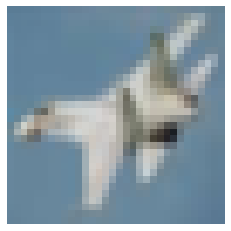

The Neural Network thinks its a Airplane with a 99.9962329864502% confidence


In [70]:
def getNum():
  while True:
    num = input("Pick a number from 0 to "+ str(test_images.shape[0])+ ": ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= test_images.shape[0]:
        return num
    else:
      print("Try again...")
def display(num):
  plt.figure()
  plt.imshow(test_images[num], cmap="gray")
  plt.axis('off')
  plt.show()

num = 10 #getNum() #commented out for testing purposes
display(num)
prediction = model.predict(test_images)
guess = np.argmax(prediction[num])
print("The Neural Network thinks its a ", class_names[guess], " with a ", prediction[num, guess]*100,"% confidence", sep="" )